In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [92]:
# train
max_index = 8

next_index: dict[str, int] = {}
index_by_prev: dict[str, int] = {}

StatsDict: dict[str, dict] = {}

for letter in letters:
    next_index[letter] = 1

for inp_idx, inp in enumerate(input_str):
    if inp_idx <= 0 or inp_idx == len(input_str) - 1:
        continue

    prev_idx = inp_idx - 1
    prev_inp = input_str[prev_idx]
    
    inp_index = next_index[inp]

    prev_index = next_index[prev_inp]

    stats_key = prev_inp + str(prev_index) + ':' + inp + str(inp_index)
    StatsDict.setdefault(stats_key, {})

    next_inp = input_str[inp_idx + 1]
    StatsDict[stats_key].setdefault(next_inp, 0)

    StatsDict[stats_key][next_inp] += 1

    by_prev_key = prev_inp + str(prev_index) + ':' + inp
    index_by_prev.setdefault(by_prev_key, inp_index)

    next_index[inp] += 1
    if next_index[inp] > max_index:
        next_index[inp] = 1
    
    # next_index[prev_inp] += 1
    # if next_index[prev_inp] > max_index:
    #     next_index[prev_inp] = 1


In [93]:
for sdk, sdv in index_by_prev.items():
    print(sdk, sdv)
    print('')

t1:h 1

h2:e 1

e2:  1

 2:s 1

s2:k 1

k2:y 1

y2:  2

 3:a 1

a2:b 1

b2:o 1

o2:v 1

v2:e 2

e3:  3

 4:t 1

t2:h 2

h3:e 3

e4:  4

 5:p 1

p2:o 2

o3:r 1

r2:t 2

t3:  5

 6:w 1

w2:a 2

a3:s 2

s3:  6

 7:t 3

t4:h 3

h4:e 4

e5:  7

 8:c 1

c2:o 3

o4:l 1

l2:o 4

o5:r 2

r3:  8

 1:o 5

o6:f 1

f2:  1

 2:t 4

t5:e 5

e6:l 2

l3:e 6

e7:v 2

v3:i 1

i2:s 3

s4:i 2

i3:o 6

o7:n 1

n2:, 1

,2:  2

 3:t 5

t6:u 1

u2:n 2

n3:e 7

e8:d 1

d2:  3

t7:o 7

o8:  4

 5:a 3

a4:  5

 6:d 2

d3:e 8

e1:a 4

a5:d 3

d4:  6

 7:c 2

c3:h 4

h5:a 5

a6:n 3

n4:n 4

n5:e 1

e2:l 3

l4:. 1

.2:  7

 8:" 1

"2:i 3

i4:t 7

t8:' 1

'2:s 4

s5:  8

 1:n 5

n6:o 8

o1:t 8

t1:  1

 2:l 4

l5:i 4

i5:k 2

k3:e 2

 3:i 5

i6:' 2

'3:m 1

m2:  3

 4:u 2

u3:s 5

s6:i 6

i7:n 6

n7:g 1

g2:, 2

,3:" 2

"3:  4

 5:c 3

c4:a 6

a7:s 6

s7:e 3

 6:h 5

h6:e 4

e5:a 7

a8:r 3

r4:d 4

d5:  6

 7:s 7

s8:o 1

o2:m 2

m3:e 5

e6:o 2

o3:n 7

n8:e 6

e7:  7

 8:s 8

s1:a 8

a1:y 2

y3:, 3

,4:  8

 1:a 1



In [94]:
for sdk, sdv in StatsDict.items():
    print(sdk, sdv)
    print('')

t1:h1 {'e': 1}

h2:e1 {' ': 1}

e2: 1 {'s': 1}

 2:s1 {'k': 1}

s2:k1 {'y': 1}

k2:y1 {' ': 1}

y2: 2 {'a': 1}

 3:a1 {'b': 1}

a2:b1 {'o': 1}

b2:o1 {'v': 1}

o2:v1 {'e': 1}

v2:e2 {' ': 1}

e3: 3 {'t': 1}

 4:t1 {'h': 1}

t2:h2 {'e': 1}

h3:e3 {' ': 1}

e4: 4 {'p': 1, 'f': 1}

 5:p1 {'o': 1}

p2:o2 {'r': 1}

o3:r1 {'t': 1}

r2:t2 {' ': 1}

t3: 5 {'w': 1}

 6:w1 {'a': 1}

w2:a2 {'s': 1}

a3:s2 {' ': 1}

s3: 6 {'t': 1}

 7:t3 {'h': 1}

t4:h3 {'e': 1}

h4:e4 {' ': 1}

e5: 7 {'c': 1}

 8:c1 {'o': 1}

c2:o3 {'l': 1}

o4:l1 {'o': 1}

l2:o4 {'r': 1}

o5:r2 {' ': 2}

r3: 8 {'o': 1}

 1:o5 {'f': 1}

o6:f1 {' ': 1}

f2: 1 {'t': 1}

 2:t4 {'e': 1}

t5:e5 {'l': 1}

e6:l2 {'e': 1}

l3:e6 {'v': 1}

e7:v2 {'i': 1}

v3:i1 {'s': 1}

i2:s3 {'i': 1}

s4:i2 {'o': 1}

i3:o6 {'n': 1}

o7:n1 {',': 1}

n2:,1 {' ': 1}

,2: 2 {'t': 1}

 3:t5 {'u': 1}

t6:u1 {'n': 1}

u2:n2 {'e': 1}

n3:e7 {'d': 1}

e8:d1 {' ': 1}

d2: 3 {'t': 1}

 4:t6 {'o': 1}

t7:o7 {' ': 1}

o8: 4 {'a': 1}

 5:a3 {' ': 1, 'r': 1}

a4: 5 {'

In [95]:
# infer
for letter in letters:
    next_index[letter] = 1

TF = []
err = 0

for inp_idx, inp in enumerate(input_str):
    if inp_idx <= 0 or inp_idx == len(input_str) - 1:
        continue

    prev_inp = input_str[inp_idx - 1]
    prev_index = next_index[prev_inp]

    by_prev_key = prev_inp + str(prev_index) + ':' + inp
    inp_index = index_by_prev.get(by_prev_key, 1)

    stats_key = prev_inp + str(prev_index) + ':' + inp + str(inp_index)
    stats = StatsDict.get(stats_key, {})

    if len(stats) > 0:
        max_key = max(stats, key=stats.get)
    else:
        max_key = 'a'
    next_inp = input_str[inp_idx + 1]
    print(max_key, next_inp, stats_key, stats)
    
    if next_inp != max_key:
        err += 1
    
    TF.append(len(stats))

    next_index[inp] += 1
    if next_index[inp] > max_index:
        next_index[inp] = 1

    # next_index[prev_inp] += 1
    # if next_index[prev_inp] > max_index:
    #     next_index[prev_inp] = 1

print(err, err / (len(input_str) / 100) )

e e t1:h1 {'e': 1}
    h2:e1 {' ': 1}
s s e2: 1 {'s': 1}
k k  2:s1 {'k': 1}
y y s2:k1 {'y': 1}
    k2:y1 {' ': 1}
a a y2: 2 {'a': 1}
b b  3:a1 {'b': 1}
o o a2:b1 {'o': 1}
v v b2:o1 {'v': 1}
e e o2:v1 {'e': 1}
    v2:e2 {' ': 1}
t t e3: 3 {'t': 1}
h h  4:t1 {'h': 1}
e e t2:h2 {'e': 1}
    h3:e3 {' ': 1}
p p e4: 4 {'p': 1, 'f': 1}
o o  5:p1 {'o': 1}
r r p2:o2 {'r': 1}
t t o3:r1 {'t': 1}
    r2:t2 {' ': 1}
w w t3: 5 {'w': 1}
a a  6:w1 {'a': 1}
s s w2:a2 {'s': 1}
    a3:s2 {' ': 1}
t t s3: 6 {'t': 1}
h h  7:t3 {'h': 1}
e e t4:h3 {'e': 1}
    h4:e4 {' ': 1}
c c e5: 7 {'c': 1}
o o  8:c1 {'o': 1}
l l c2:o3 {'l': 1}
o o o4:l1 {'o': 1}
r r l2:o4 {'r': 1}
    o5:r2 {' ': 2}
o o r3: 8 {'o': 1}
f f  1:o5 {'f': 1}
    o6:f1 {' ': 1}
t t f2: 1 {'t': 1}
e e  2:t4 {'e': 1}
l l t5:e5 {'l': 1}
e e e6:l2 {'e': 1}
v v l3:e6 {'v': 1}
i i e7:v2 {'i': 1}
s s v3:i1 {'s': 1}
i i i2:s3 {'i': 1}
o o s4:i2 {'o': 1}
n n i3:o6 {'n': 1}
, , o7:n1 {',': 1}
    n2:,1 {' ': 1}
t t ,2: 2 {'t': 1}
u u  3:t5 {'u': 1}
n n 

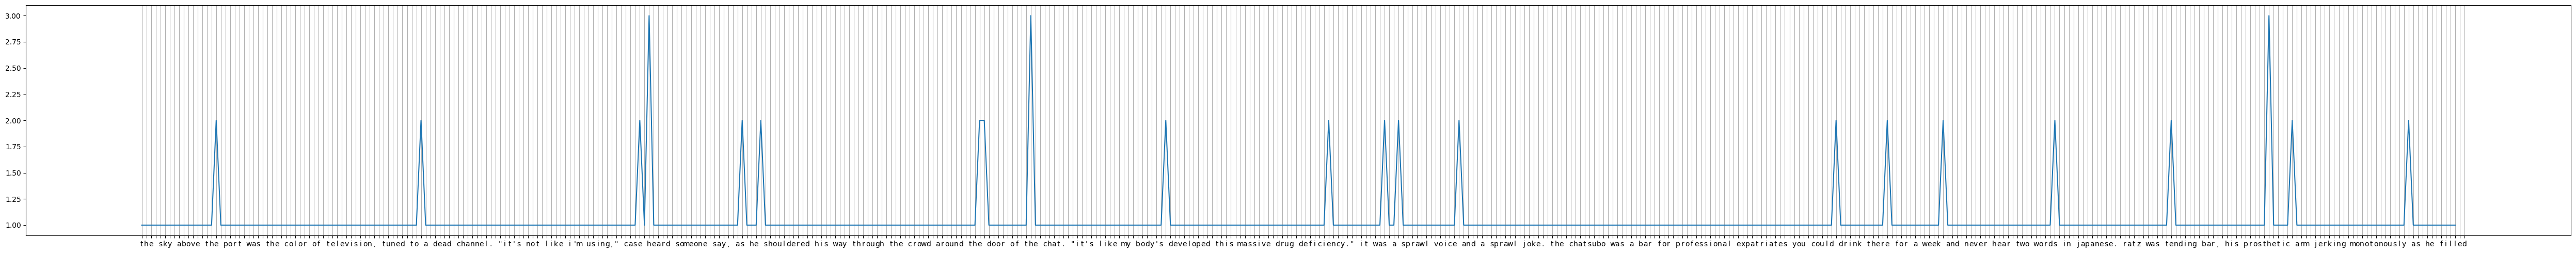

In [96]:
TF = np.array(TF, dtype=float)
# TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
# TF[np.where(TF > 0)] = 0
# TF = np.abs(TF)
# TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(TF.size), TF)
axs.xaxis.set_ticks(np.arange(len(input_str)) ,input_str)
axs.xaxis.grid(True)

plt.show()